In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
# v = [C2, CP, M, pM, Y, YP]


# Rate Constants
k1aaCT  = 0.015
k2      = 0
k3CT    = 200
k4      = 180 # adjustable
k4prime = 0.018
k5tilP  = 0
k6      = 1 # adjustable
k7      = 0.6
k8tilP  = 50 # >> k9
k9      = 10 # >> k6


# Initial Conditions
dC20 = 10
dCP0 = 0
dpM0 = 0
dM0  = 0
dY0  = 0
dYP0 = 0
t0 = 0
tf = 1


def system(t, v):
    dC2 = k6*v[2] - k8tilP*v[0] + k9*v[1]
    dCP = -k3CT*v[1]*v[4]/(v[0]+v[1]+v[2]+v[3]) + k8tilP*v[0] - k9*v[1]
    dpM = k3CT*v[1]*v[4]/(v[0]+v[1]+v[2]+v[3]) - v[3]*(k4prime + k4*v[2]/(v[0] + v[1])**2) + k5tilP*v[2]
    dM  = v[3]*(k4prime + k4*v[2]/(v[0] + v[1])**2) - k5tilP*v[2] - k6*v[2]
    dY  = k1aaCT*(v[0]+v[1]+v[2]+v[3]) - k2*v[4] - k3CT*v[1]*v[4]/(v[0]+v[1]+v[2]+v[3])
    dYP = k6*v[2] - k7*v[5]
    return [dC2, dCP, dpM, dM, dY, dYP]

solution = solve_ivp(system, (t0, tf), [dC20, dCP0, dpM0, dM0, dY0, dYP0])


C2 = solution.y[0]
CP = solution.y[1]
pM = solution.y[2]
M  = solution.y[3]
Y  = solution.y[4]
YP = solution.y[5]

YT = Y + YP + pM + M
CT = C2 + CP + pM + M

    

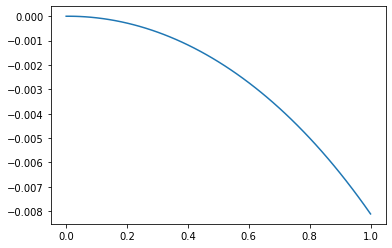

In [5]:
plt.plot(solution.t, M/CT)
plt.show()